<a href="https://colab.research.google.com/github/ASH418452001/BankTransaction/blob/main/CSE_CIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection Using Machine Learning/Deep Learning
This notebook involves the making of machine learning & deep learning models to classify the given data of obtained as a network intrusion into differen classes (malignant or benign). Given a sample point, the objective of machine learning model will be to classify that whether the intrusion made is  **Benign** or is a **BruteForce** (either FTP or SSH).

# Importing Libraries
First, we will import libraries that we need to start our workflow. The libraries we are using are:
* NumPy
* Pandas
* Matplotlib
* Scikit-learn
* Keras
* TensorFlow

In [ ]:
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
!nvidia-smi

# Loading the Data
First step is to load the available data into our memory.

In [ ]:
%%time
# load the data into memory
network_data = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv')

CPU times: user 13.3 s, sys: 1.94 s, total: 15.3 s
Wall time: 25.7 s


# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:
* Data Visuals
* Data Understanding
* Data Analysis

In [ ]:
# check the shape of data
network_data.shape

(1048575, 80)

In [ ]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


We have a total of **1 million+** samples and **80** features in data.

In [ ]:
network_data.head(4)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
# check the columns in data
network_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
# check the number of columns
print('Total columns in our data: %s' % str(len(network_data.columns)))

Total columns in our data: 80


The dataset is huge. We have a total of **80** columns in our data.

In [ ]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

The following information tells us that:
* We have a huge amount of data, containing **1 million+** entries (samples)
* There are a total of **80** columns belinging to each sample
* There are missing values in our data, which need to be filled or dropped for proper modelling
* The memory consumption of data is **700 MB**

In [ ]:
# check the number of values for labels
network_data['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

Most of the network intrusions in our data are benign, as output from above code cell.

## Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

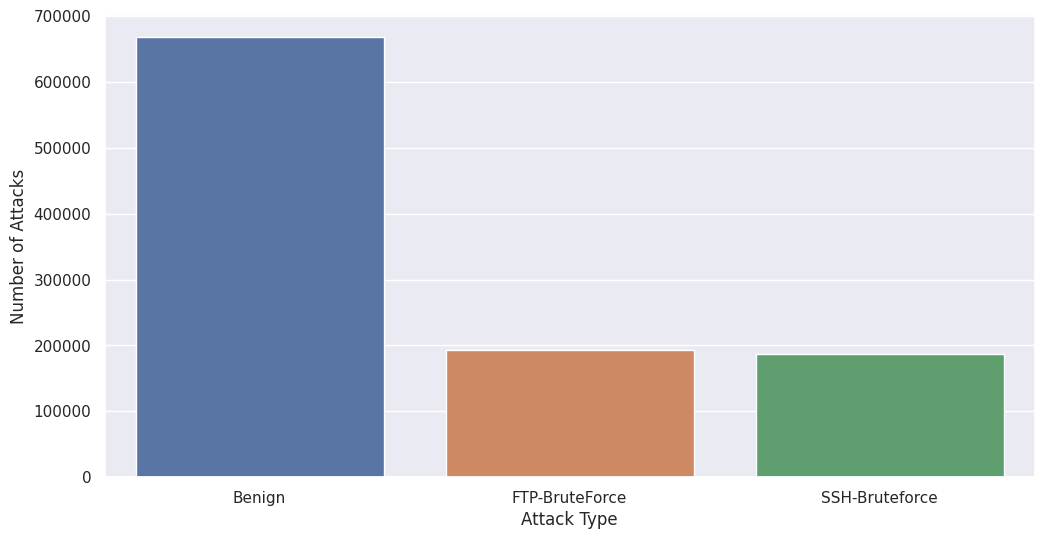

In [ ]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=network_data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

CPU times: user 1.45 s, sys: 55.1 ms, total: 1.5 s
Wall time: 1.48 s


<Axes: xlabel='Bwd Pkts/s', ylabel='Fwd Seg Size Min'>

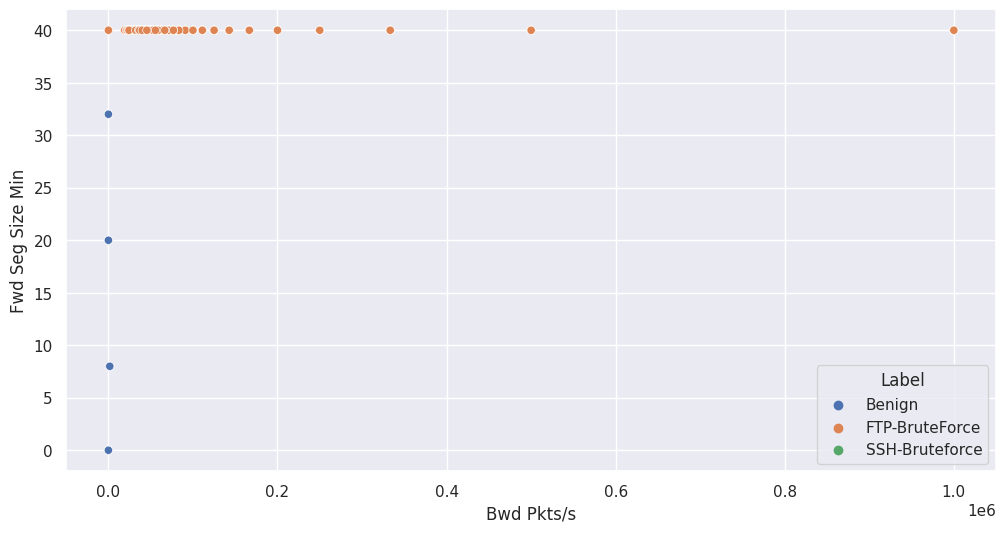

In [ ]:
%%time
sns.set(rc={'figure.figsize':(12, 6)})
sns.scatterplot(x=network_data['Bwd Pkts/s'][:50000], y=network_data['Fwd Seg Size Min'][:50000],
                hue='Label', data=network_data)

From the graphs, we came to know that:
* Most of the attacks made by intruders are malignant (almost 700k)
* **FTP-BruteFore** and **SSH-BruteForce** type attacks are less in numbers (less than 200k)
* Most of the intruders try to make a malignant attack on network systems

In [ ]:
# check the dtype of timestamp column
(network_data['Timestamp'].dtype)

dtype('O')

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data.

In [ ]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2277,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

All features in the data have no null or missing values, except one feature that contains **2277** missing values. We need to remove this column from our data, so that our data may get cleaned.

In [ ]:
# drop null or missing columns
cleaned_data = network_data.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

After removing the missing valued column in our data, we have now no feature that contains any missing or null value. Data is cleaned now.

### Label Encoding
The Label feature in the data contains 3 labels as **Benign**, **BruteForceFTP** and **BruteForceSSH**. All these are in string format. For our neural network, we need to convert them into numbers so that our NN may understand their representations.

In [ ]:
# encode the column labels
label_encoder = LabelEncoder()
cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])
cleaned_data['Label'].unique()

<ipython-input-43-c0bdb82b1f12>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1, 2])

In [ ]:
# check for encoded labels
cleaned_data['Label'].value_counts()

0    665355
1    193354
2    187589
Name: Label, dtype: int64

## Shaping the data for CNN
For applying a convolutional neural network on our data, we will have to follow following steps:
* Seperate the data of each of the labels
* Create a numerical matrix representation of labels
* Apply resampling on data so that can make the distribution equal for all labels
* Create X (predictor) and Y (target) variables
* Split the data into train and test sets
* Make data multi-dimensional for CNN
* Apply CNN on data

In [ ]:
# make 3 seperate datasets for 3 feature labels
data_1 = cleaned_data[cleaned_data['Label'] == 0]
data_2 = cleaned_data[cleaned_data['Label'] == 1]
data_3 = cleaned_data[cleaned_data['Label'] == 2]

# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make bruteforce feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_ssh = pd.DataFrame(y_3)

# merging the original dataframe
X = pd.concat([data_1, data_2, data_3], sort=True)
y = pd.concat([y_benign, y_bf, y_ssh], sort=True)

In [ ]:
y_1, y_2, y_3

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [ ]:
print(X.shape)
print(y.shape)

(1046298, 80)
(1046298, 1)


In [ ]:
# checking if there are some null values in data
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

## Data Argumentation
Ti avoid biasing in data, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.

In [ ]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000,
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000,
                           random_state=123, replace=True)

In [ ]:
train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample])
train_dataset.head(2)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
659775,53,17,14/02/2018 03:29:35,79333,2,2,66,254,33,33,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
409094,443,6,14/02/2018 10:03:30,621591,9,8,1542,4796,1157,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


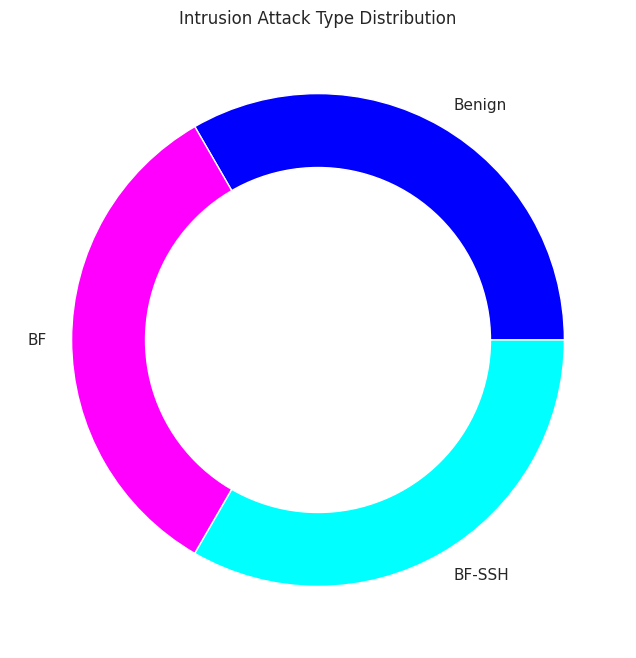

In [ ]:
# viewing the distribution of intrusion attacks in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'BF', 'BF-SSH'], colors=['blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(circle)

## Making X & Y Variables (CNN)

In [ ]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([0, 1, 2]), array([2, 1, 0]))

In [ ]:
y_train = to_categorical(target_train, num_classes=3)
y_test = to_categorical(target_test, num_classes=3)

## Data Splicing
This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of **80-20**, i.e., **80%** data to be used for training & **20%** to be used for testing purpose.

In [ ]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [ ]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[2.20000e+01, 3.64274e+05, 2.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 7.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.10000e+01, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.20000e+01, 3.77324e+05, 2.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.30000e+01, 9.93000e+02, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.10000e+01, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 72)
(6000, 72)
(60000, 3)
(6000, 3)


In [ ]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((60000, 72, 1), (6000, 72, 1))

In [ ]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 72, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 72, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 36, 64)           256       
 hNormalization)                                                 
                                                        

In [ ]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=100, batch_size=32,
          validation_data=(X_test, y_test), callbacks=[logger])



Epoch 1/100
1875/1875 [==============================] - 55s 28ms/step - loss: 0.1380 - accuracy: 0.9534 - val_loss: 2.0015 - val_accuracy: 0.3373
Epoch 2/100
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0866 - accuracy: 0.9725 - val_loss: 0.9831 - val_accuracy: 0.6148
Epoch 3/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0818 - accuracy: 0.9742 - val_loss: 1.8675 - val_accuracy: 0.4583
Epoch 4/100
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0765 - accuracy: 0.9755 - val_loss: 2.0132 - val_accuracy: 0.4748
Epoch 5/100
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0737 - accuracy: 0.9765 - val_loss: 1.0853 - val_accuracy: 0.5298
Epoch 6/100
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0739 - accuracy: 0.9775 - val_loss: 1.0486 - val_accuracy: 0.7737
Epoch 7/100
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0729 - accuracy: 0.9761 - val_loss: 1

## Visualization of Results (CNN)
Let's make a graphical visualization of results obtained by applying CNN to our data.

In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0] * 100))

In [ ]:
import pandas as pd

data = {
    'timestamp': ['14/02/2018 08:31:01', '15/02/2018 09:45:22', '16/02/2018 10:15:00'],
    'other_column': [1, 2, 3]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_numeric'] = df['timestamp'].astype(int)
df.drop(columns=['timestamp'], inplace=True)
print(df)


   other_column    timestamp_numeric
0             1  1518597061000000000
1             2  1518687922000000000
2             3  1518776100000000000


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[0], scores[0] * 100))


Epoch 1/10
20926/20926 [==============================] - 80s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 2/10
20926/20926 [==============================] - 99s 5ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 3/10
20926/20926 [==============================] - 89s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 4/10
20926/20926 [==============================] - 78s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 5/10
20926/20926 [==============================] - 83s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 6/10
20926/20926 [==============================] - 77s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 7/10
20926/20926 [==============================] - 79s 4ms/step - loss: nan - accuracy: 0.6359 - val_loss: nan - val_accuracy: 0.6352
Epoch 8/10
20

In [ ]:
model.add(Dense(1, activation='sigmoid'))

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.8, verbose=1)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.1).astype(int)

accuracy = np.mean(y_pred_classes == y_test)
accuracy_float = float(accuracy)
print("Test Accuracy: {:.2f}%".format(accuracy_float * 100))



Epoch 1/10
5232/5232 [==============================] - 60s 11ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 2/10
5232/5232 [==============================] - 63s 12ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 3/10
5232/5232 [==============================] - 49s 9ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 4/10
5232/5232 [==============================] - 61s 12ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 5/10
5232/5232 [==============================] - 51s 10ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 6/10
5232/5232 [==============================] - 50s 9ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 7/10
5232/5232 [==============================] - 64s 12ms/step - loss: nan - accuracy: 0.6344 - val_loss: nan - val_accuracy: 0.6361
Epoch 8/10
5232/5232 [

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0] * 100))

In [ ]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

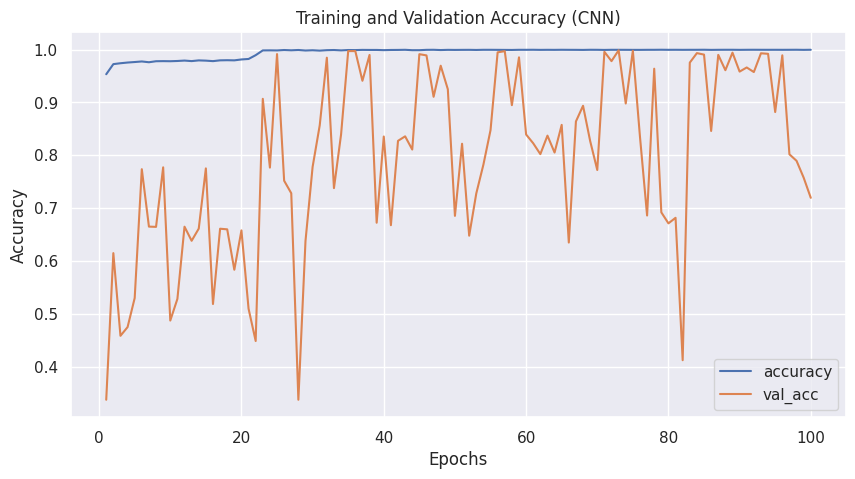

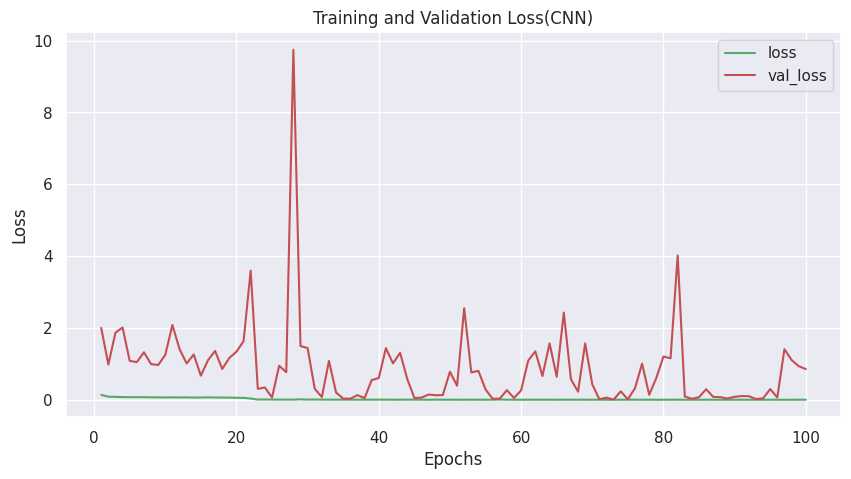

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
print(network_data.describe())


           Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.876262e+03  8.107557e+00   6.255555e+06  6.206622e+00  7.211191e+00   
std    1.444344e+04  4.460625e+00   1.260291e+09  4.447851e+01  1.048682e+02   
min    0.000000e+00  0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    2.200000e+01  6.000000e+00   7.000000e+00  1.000000e+00  1.000000e+00   
50%    5.300000e+01  6.000000e+00   1.023000e+03  2.000000e+00  1.000000e+00   
75%    4.430000e+02  6.000000e+00   4.066690e+05  7.000000e+00  6.000000e+00   
max    6.553300e+04  1.700000e+01   1.200000e+08  5.115000e+03  9.198000e+03   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean      4.479936e+02     4.521803e+03     1.745736e+02     8.389535e+00   
std       1.573541e+04     1.515021e+05     2.87

In [ ]:
print(np.any(np.isinf(X_train)))
print(np.any(np.isnan(X_train)))

True
False


In [ ]:
predictions = model.predict(X_test)

6540/6540 [==============================] - 14s 2ms/step


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv')
print(data)


         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02/2018 10:53:28        5807256             6   

         Tot Bwd Pkts  TotL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

data = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv')

true_labels = data['Label']
predicted_labels = data['Label']
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=data['Label'].unique())

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

class_labels = data['Label'].unique()
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=class_labels, showindex=class_labels, tablefmt='grid'))
print(f"Accuracy: {accuracy:.2f}")


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

data = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv')

true_labels = data['Label']
predicted_labels = data['Label']
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=data['Label'].unique())

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

class_labels = data['Label'].unique().tolist()  # Convert NumPy array to list
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=class_labels, showindex=class_labels, tablefmt='grid'))
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
+----------------+----------+------------------+------------------+
|                |   Benign |   FTP-BruteForce |   SSH-Bruteforce |
+================+==========+==================+==================+
| Benign         |   667626 |                0 |                0 |
+----------------+----------+------------------+------------------+
| FTP-BruteForce |        0 |           193360 |                0 |
+----------------+----------+------------------+------------------+
| SSH-Bruteforce |        0 |                0 |           187589 |
+----------------+----------+------------------+------------------+
Accuracy: 1.00
